<a href="https://colab.research.google.com/github/DantheOPMan/cs-class/blob/main/probability_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 3

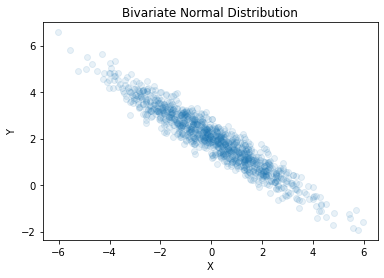

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the distribution
mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]

# Generate the Cholesky factorization of the covariance matrix
L = np.linalg.cholesky(cov)

# Generate random samples from the standard normal distribution
samples = np.random.normal(0, 1, (1000, 2))
# Transform the samples to the desired distribution using the Cholesky factorization
samples = samples @ L + mean
# Plot the samples as a scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

# Define a grid of points to evaluate the distribution on
x, y = np.mgrid[-2:2:.01, -9:9:.01]
pos = np.dstack((x, y))

# Evaluate the bivariate normal distribution on the grid
z = np.exp(-0.5 * np.sum((np.dot(pos - mean, np.linalg.inv(cov)) * (pos - mean)), axis=2)) / (2 * np.pi * np.linalg.det(cov) ** 0.5)

# Plot the contour of the distribution
#plt.contour(x, y, z, 10, cmap='viridis')

# Add labels and title to the plot
#plt.axhline(y = -1, color = 'purple', linestyle = '-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Normal Distribution')

# Show the plot
plt.show()


Question 4

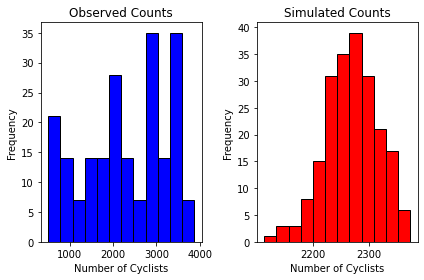

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a csv file
data = (pd.read_csv('/content/nyc-east-river-bicycle-counts.csv'))['Brooklyn Bridge']

# Plot the histogram of the observed counts
plt.hist(data, bins=20, edgecolor='black', alpha=0.7, label='Observed')

# Simulate the counts using the Poisson distribution
simulated = np.random.poisson(np.mean(data), len(data))

# Plot the histogram of the observed counts
plt.subplot(1, 2, 1)
plt.hist(data, bins=12, color='blue', edgecolor='black')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.title('Observed Counts')

# Plot the histogram of the simulated counts
plt.subplot(1, 2, 2)
plt.hist(simulated, bins=12, color='red', edgecolor='black')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.title('Simulated Counts')

plt.tight_layout()
plt.show()


Question 5


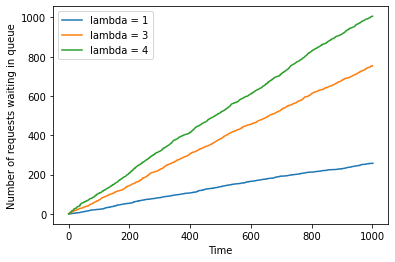

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1(lambda_, mew, time_limit):
    # Initialize variables
    time = 0
    requests = []
    waiting_times = []
    num_requests = 0
    total_waiting_time = 0

    while time < time_limit:
        # Generate arrival time for the next request
        arrival_time = np.random.exponential(scale=1/lambda_)
        time += arrival_time
        requests.append(time)

        # Check if the server is busy
        if num_requests > 0:
            waiting_time = np.random.exponential(scale=1/mew)
            total_waiting_time += waiting_time
            waiting_times.append(total_waiting_time)
        else:
            waiting_times.append(0)

        num_requests += 1

    return requests, waiting_times

# Set the time limit for the simulation
time_limit = 1000

# Set the arrival rates and the service rate
lambdas = [1, 3, 4]
mew = 4

# Simulate the M/M/1 queue for each arrival rate
for lambda_ in lambdas:
    requests, waiting_times = simulate_mm1(lambda_, mew, time_limit)

    # Plot the number of requests waiting in the queue as a function of time
    plt.plot(requests, waiting_times, label=f"lambda = {lambda_}")

plt.xlabel("Time")
plt.ylabel("Number of requests waiting in queue")
plt.legend()
plt.show()
